# Assessment Review

The topics covered will be:

1. SQL
2. Bayesian Statistics
3. Normal Distributions
4. Statistical Tests

In [1]:
from src.call import call_on_students

## Part 1: SQL

In [4]:
# Need to import pandas and sqlite3
import pandas as pd
import sqlite3 as sqlite3

In [5]:
conn = sqlite3.connect('data/Chinook_Sqlite.sqlite')

In [6]:
pd.read_sql(
    """
    SELECT *
    FROM Customer
    LIMIT 3
    """, conn
)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3


In [8]:
pd.read_sql(
    """
    SELECT *
    FROM Invoice
    LIMIT 3
    """, conn
)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94


In [11]:
pd.read_sql("""
    PRAGMA foreign_key_list(Invoice)
""", conn)

,id,seq,table,from,to,on_update,on_delete,match
0,0,0,Customer,CustomerId,CustomerId,NO ACTION,NO ACTION,NONE


In [12]:
pd.read_sql("""
    SELECT *
      FROM sqlite_master

""", conn)

,type,name,tbl_name,rootpage,sql
0,table,Album,Album,2,CREATE TABLE [Album]\n(\n [AlbumId] INTEGER...
1,table,Artist,Artist,3,CREATE TABLE [Artist]\n(\n [ArtistId] INTEG...
2,table,Customer,Customer,4,CREATE TABLE [Customer]\n(\n [CustomerId] I...
3,table,Employee,Employee,7,CREATE TABLE [Employee]\n(\n [EmployeeId] I...
4,table,Genre,Genre,9,CREATE TABLE [Genre]\n(\n [GenreId] INTEGER...
5,table,Invoice,Invoice,10,CREATE TABLE [Invoice]\n(\n [InvoiceId] INT...
6,table,InvoiceLine,InvoiceLine,12,CREATE TABLE [InvoiceLine]\n(\n [InvoiceLin...
7,table,MediaType,MediaType,14,CREATE TABLE [MediaType]\n(\n [MediaTypeId]...
8,table,Playlist,Playlist,15,CREATE TABLE [Playlist]\n(\n [PlaylistId] I...
9,table,PlaylistTrack,PlaylistTrack,16,CREATE TABLE [PlaylistTrack]\n(\n [Playlist...


### Task 1: Write a query to return the customer IDs for every customer in Germany.

In [14]:
# call_on_students(1)
pd.read_sql("""
    SELECT customerId
      FROM customer
     WHERE country = 'Germany'
""", conn)

,CustomerId
0,2
1,36
2,37
3,38


In [17]:
pd.read_sql("""

SELECT DISTINCT customerId
FROM invoice
WHERE billingcountry = 'Germany'

""", conn)

,CustomerId
0,2
1,36
2,37
3,38


### Task 2: Write a query to return the last names, email addresses and *billing* addresses of the customers who live in Canada.

In [ ]:
# call_on_students(1)

In [ ]:
pd.read_sql("""


""")

### Task 3: Write a query to return the billing totals by country, in descending order of the totals.

In [19]:
# call_on_students(1)
pd.read_sql("""

    SELECT SUM(total) as sum, billingcountry
      FROM invoice
  GROUP BY billingcountry
  ORDER BY sum DESC
""", conn)


,sum,BillingCountry
0,523.06,USA
1,303.96,Canada
2,195.10,France
3,190.10,Brazil
4,156.48,Germany
5,112.86,United Kingdom
6,90.24,Czech Republic
7,77.24,Portugal
8,75.26,India
9,46.62,Chile


### ***Task 4: Write a query to return the last names, email addresses, billing addresses, and most recent invoice dates for the customers whose most recent invoice is after Dec 31, 2011.

In [30]:
# call_on_students(1)
pd.read_sql("""
    SELECT DISTINCT c.lastname, c.email, i.billingaddress, MAX(i.invoicedate)
      FROM customer AS c
      JOIN invoice AS i
          USING(customerId)
     WHERE i.invoicedate > "2011-12-31"
  GROUP BY customerid
  ORDER BY MAX(i.invoicedate) DESC

""", conn)

,LastName,Email,BillingAddress,MAX(i.invoicedate)
0,Pareek,manoj.pareek@rediff.com,"12,Community Centre",2013-12-22 00:00:00
1,Hämäläinen,terhi.hamalainen@apple.fi,Porthaninkatu 9,2013-12-14 00:00:00
2,Sampaio,masampaio@sapo.pt,"Rua dos Campeões Europeus de Viena, 4350",2013-12-09 00:00:00
3,Brown,robbrown@shaw.ca,796 Dundas Street West,2013-12-06 00:00:00
4,Stevens,vstevens@yahoo.com,319 N. Frances Street,2013-12-05 00:00:00
5,Chase,kachase@hotmail.com,801 W 4th Street,2013-12-04 00:00:00
6,Gordon,johngordon22@yahoo.com,69 Salem Street,2013-12-04 00:00:00
7,Miller,dmiller@comcast.com,541 Del Medio Avenue,2013-11-21 00:00:00
8,Holý,hholy@gmail.com,Rilská 3174/6,2013-11-13 00:00:00
9,Gutiérrez,diego.gutierrez@yahoo.ar,307 Macacha Güemes,2013-11-08 00:00:00


## Part 2: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 5: Calculate the probability

In [ ]:
# call_on_students(1)

**1. Which probability are we trying to find?**

   - 
   

**2. Based on that, what other pieces do we need?**

   - 
    

**3. Result?**

   - 

## Part 3: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 6: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [ ]:
# call_on_students(1)

In [33]:
# Code here
z_eight = (8-6)/2
z_eight

1.0

### Task 7: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [ ]:
# call_on_students(1)

In [40]:
from scipy import stats
import numpy as np

In [55]:
# Code here
over_eight = 1 - stats.norm(loc=0, scale=1).cdf(1)
# over_eight = stats.norm(loc=6, scale=2).sf(8)
over_eight

0.15865525393145707

### Task 8: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [ ]:
# call_on_students(1)

In [45]:
# Code here
n = 7

samp_standard_error = 0.5/np.sqrt(n)
sample_mean = 5

stats.t.interval(alpha=0.95, loc=sample_mean, scale=samp_standard_error, df=n-1)

/var/folders/9n/kzdbb24d6718p004k3bbjtr40000gn/T/ipykernel_43829/264565090.py:7: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(alpha=0.95, loc=sample_mean, scale=samp_standard_error, df=n-1)


(4.53757712628571, 5.46242287371429)

In [56]:
t_crit = stats.t.ppf(.975, df=n-1)
t_crit

2.4469118487916806

In [62]:
margin_error = t_crit*samp_standard_error
sample_mean-margin_error, sample_mean+margin_error

(4.53757712628571, 5.46242287371429)

### Task 9: Interpret the 95% Confidence Interval that you derived in the above question

In [ ]:
# call_on_students(1)

Interpret: 

- we are 95% confident that the mean hours of sleep for this freshman is between these two intervals


## Part 4: Statistical Testing

Let's make some hypotheses about cars!

### Task 10: Set Up

In [ ]:
# call_on_students(1)

In [74]:
# Imports - need pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv('data/auto-mpg.csv')

In [ ]:
# Check the head of our data


In [ ]:
# Check the info on our data


In [ ]:
# Describe the data


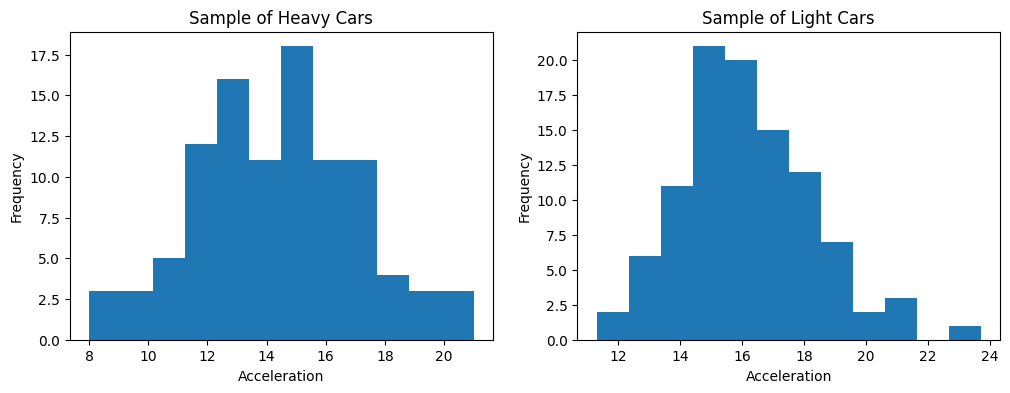

In [76]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 11: Set up the null and alternative hypotheses for this test

In [ ]:
# call_on_students(1)

**Null hypothesis:**

- 


**Alternative hypothesis:**

- 


### Task 12: Describe your Type 1 and Type 2 errors in this context

In [ ]:
# call_on_students(1)

**Type I Error:**

- 


**Type II Error:**

- 



### Task 13: The Hypothesis Test!

### 13a: Describe the type of test:

In [ ]:
# call_on_students(1)

Description:

- 


### 13b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [ ]:
# call_on_students(1)

In [ ]:
# Code here


### 13c: Analyze your results: can you reject the null hypothesis?

In [ ]:
# call_on_students(1)

Can you reject the null hypothesis?

- 
